In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("/content/air-quality-data.csv")
df.head(10)

,Timestamp,PM2.5
0,01-01-2018 00:00,90.19
1,01-01-2018 01:00,86.98
2,01-01-2018 02:00,86.06
3,01-01-2018 03:00,94.04
4,01-01-2018 04:00,108.78
5,01-01-2018 05:00,117.86
6,01-06-2018 17:00,150.89
7,11-07-2018 21:00,245.63
8,11-08-2018 00:00,175.19
9,01-01-2018 09:00,92.45


In [5]:
df.shape

(31861, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31861 entries, 0 to 31860
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  31861 non-null  object 
 1   PM2.5      31861 non-null  float64
dtypes: float64(1), object(1)
memory usage: 498.0+ KB


detected that datatype assigned to timestamp is wrong must be changed to datetime..

#1.conversion of datatype Timestamp.object to Timestamp.datetime

In [7]:
df["Timestamp"]=pd.to_datetime(df["Timestamp"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31861 entries, 0 to 31860
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  31861 non-null  datetime64[ns]
 1   PM2.5      31861 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 498.0 KB


found no null values 

#2.show year wise average pollution with a linechart

create yearcolumn with Timestamp

In [10]:
df["year"]=df.Timestamp.dt.year

In [11]:
df.head(2)

,Timestamp,PM2.5,year
0,2018-01-01 00:00:00,90.19,2018
1,2018-01-01 01:00:00,86.98,2018


In [17]:
avg_year=df.groupby("year")["PM2.5"].mean()

In [18]:
avg_year

year
2018    54.468449
2019    49.511273
2020    42.386302
2021    44.850633
Name: PM2.5, dtype: float64

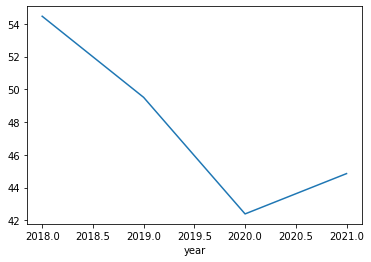

In [21]:
avg_year.plot(kind="line")

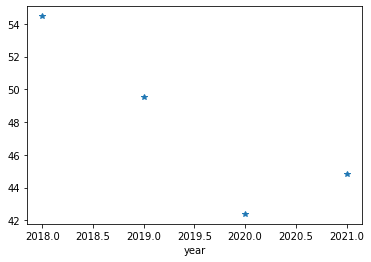

In [37]:
avg_year.plot(kind="line",style='*')

#3.draw area plot sowing average pollution monthwise.

In [24]:
df["month"]=df.Timestamp.dt.month

In [25]:
df.head(3)

,Timestamp,PM2.5,year,month
0,2018-01-01 00:00:00,90.19,2018,1
1,2018-01-01 01:00:00,86.98,2018,1
2,2018-01-01 02:00:00,86.06,2018,1


In [27]:
avg_month=df.groupby("month")["PM2.5"].mean()

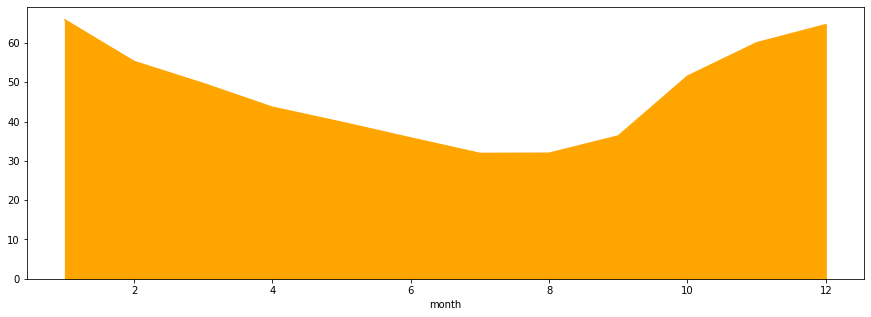

In [35]:
avg_month.plot(kind="area",color="orange",figsize=(15,5))

#4.Draw a bar graph to show the hour-wise avearge pollution

In [30]:
df["hour"]=df.Timestamp.dt.hour

In [31]:
df.head(2)

,Timestamp,PM2.5,year,month,hour
0,2018-01-01 00:00:00,90.19,2018,1,0
1,2018-01-01 01:00:00,86.98,2018,1,1


In [32]:
avg_pollution=df.groupby("hour")["PM2.5"].mean()

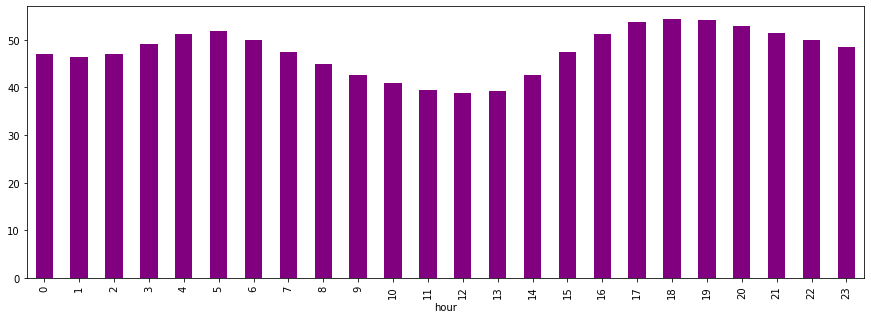

In [38]:
avg_pollution.plot(kind="bar",color="purple",figsize=(15,5))

#5.usually in which months the air was recorded 'veryunhealthy' 

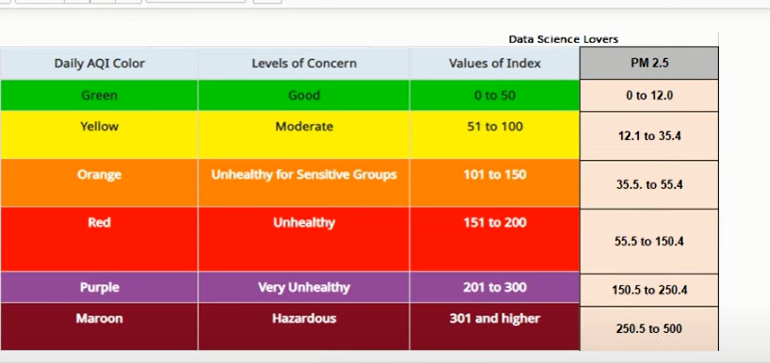

as per the given image it tells about that purple color effects more with particulate matter of 150.5-250.4

In [52]:
df_unhealthy=df[(df["PM2.5"]>=150.5) & (df["PM2.5"]<=250.4)]

In [53]:
df_unhealthy

,Timestamp,PM2.5,year,month,hour
6,2018-01-06 17:00:00,150.89,2018,1,17
7,2018-11-07 21:00:00,245.63,2018,11,21
8,2018-11-08 00:00:00,175.19,2018,11,0
31,2018-11-07 22:00:00,232.03,2018,11,22
32,2018-11-08 01:00:00,169.15,2018,11,1
55,2018-11-07 20:00:00,223.21,2018,11,20
56,2018-11-08 03:00:00,160.34,2018,11,3
79,2018-11-07 18:00:00,212.56,2018,11,18
103,2018-11-07 19:00:00,207.41,2018,11,19
126,2018-11-07 17:00:00,183.19,2018,11,17


In [54]:
df_unhealthy.shape

(28, 5)

#6.usually in which months the air was recorded 'fresh(good)' 

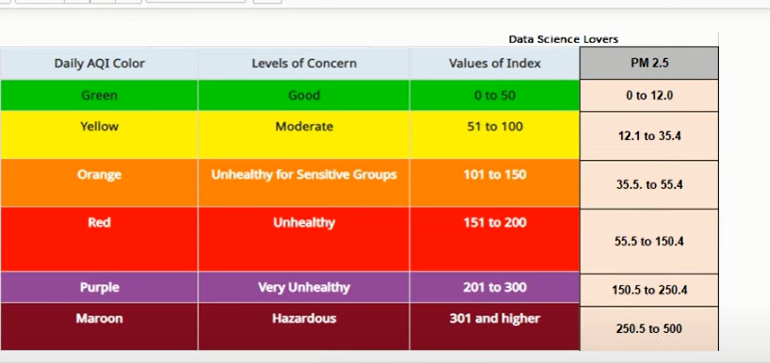

it shows green colors with pm 0 to 12.0 gives good ..

In [56]:
df_healthy=df[df["PM2.5"]<=12.0]

In [58]:
df_healthy.value_counts("month")

month
8    33
7     6
6     5
1     3
4     3
5     2
dtype: int64

#7.in 2018 year,how many times AQI was recorded "moderate"..

In [60]:
year_2k18=df[(df["year"]==2018) & (df["PM2.5"]>=12.1) & (df["PM2.5"]<=35.4)]

In [61]:
year_2k18

,Timestamp,PM2.5,year,month,hour
1820,2018-01-04 04:00:00,33.34,2018,1,4
2038,2018-12-04 00:00:00,35.39,2018,12,0
2215,2018-04-19 13:00:00,28.90,2018,4,13
2306,2018-04-23 09:00:00,34.83,2018,4,9
2307,2018-04-23 11:00:00,33.50,2018,4,11
...,...,...,...,...,...
9981,2018-06-28 06:00:00,19.75,2018,6,6
9982,2018-07-17 07:00:00,19.27,2018,7,7
9983,2018-07-16 08:00:00,18.96,2018,7,8
10004,2018-08-25 06:00:00,17.45,2018,8,6


In [64]:
year_2k18.year.unique()

array([2018])

#8.how was the weather in the month of jan&july?..

In [65]:
df.head(2)

,Timestamp,PM2.5,year,month,hour
0,2018-01-01 00:00:00,90.19,2018,1,0
1,2018-01-01 01:00:00,86.98,2018,1,1


In [66]:
df[df["month"]==1]["PM2.5"].mean() 

65.82906685236769

In [67]:
df[df["month"]==7]["PM2.5"].mean()

31.88416146645866

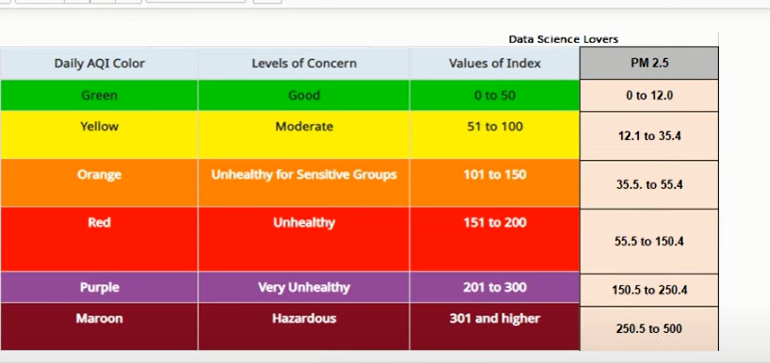

In [68]:
65.45  #--->unhealthy in january month 
31.23 #-->unhealhty for sensitive people in july month

31.23